In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn
import sklearn
import sklearn.preprocessing as pre
from scipy.stats import norm
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

pd.set_option('max_columns', None)

In [2]:
#Read deviation file = export from database
df_f_dev = pd.read_csv('feature_ibor_abor_deviation.csv', sep=';')
df_f_dev.head(10)


,EFFECTIVE_DATE,PORTFOLIO_CODE,MARKET_VALUE_DIRTY_PORTFOLIO,OPRH_TOTAL_AMOUNT_BASE,DEVIATION_IN_PERCENT_OF_IBOR
0,2019-11-04 00:00:00.000,A-AA25,4.855158e+08,484074025.6,0.002970
1,2019-11-05 00:00:00.000,A-AA25,4.897845e+08,488636111.7,0.002345
2,2019-11-06 00:00:00.000,A-AA25,4.898977e+08,488152563.0,0.003562
3,2019-11-07 00:00:00.000,A-AA25,4.926490e+08,491071123.4,0.003203
4,2019-11-08 00:00:00.000,A-AA25,4.911470e+08,489895646.5,0.002548
5,2019-11-11 00:00:00.000,A-AA25,4.810345e+08,480358054.1,0.001406
6,2019-11-12 00:00:00.000,A-AA25,4.828674e+08,482542382.6,0.000673
7,2019-11-13 00:00:00.000,A-AA25,4.797869e+08,477039980.9,0.005725
8,2019-11-14 00:00:00.000,A-AA25,4.773435e+08,476580318.5,0.001599
9,2019-11-15 00:00:00.000,A-AA25,4.754048e+08,476341668.8,-0.001971


In [3]:
deviation = df_f_dev['DEVIATION_IN_PERCENT_OF_IBOR']

In [4]:
deviation.head(10)

0    0.002970
1    0.002345
2    0.003562
3    0.003203
4    0.002548
5    0.001406
6    0.000673
7    0.005725
8    0.001599
9   -0.001971
Name: DEVIATION_IN_PERCENT_OF_IBOR, dtype: float64

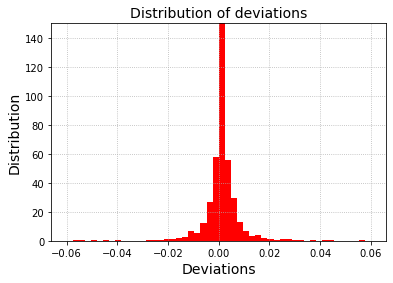

In [5]:


fig = plt.figure()
ax = fig.add_subplot()

# plot histogram 
ax.hist(deviation, bins=50, range=(-0.06,+0.06), density=True, color='red')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("Deviations", fontsize=14)
ax.set_ylabel("Distribution", fontsize=14)

ax.set_ylim([0,150])

# add plot title
ax.set_title('Distribution of deviations', fontsize=14);



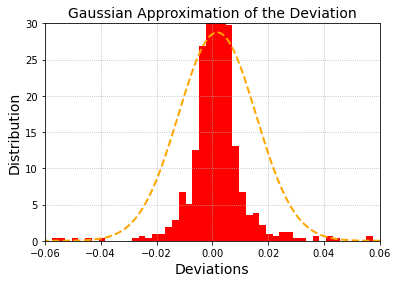

In [6]:
# determine mean and std of the "sepal width" feature
deviation_mean = np.mean(deviation)
deviation_std = np.std(deviation)

# take fig and ax from aboveprepare plot
fig = plt.figure()
ax = fig.add_subplot()

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(-0.1, 0.1, 0.001), norm.pdf(np.arange(-0.1, 0.1, 0.001), deviation_mean, deviation_std), color='orange', linestyle='--', linewidth=2)

# plot histogram 
ax.hist(deviation, bins=50, range=(-0.06,+0.06), density=True, color='red')


# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("Deviations", fontsize=14)
ax.set_ylabel("Distribution", fontsize=14)

ax.set_ylim([0,30])
ax.set_xlim([-0.06,0.06])

# add plot title
#ax.set_title('Distribution of deviations', fontsize=14);
# add plot title
ax.set_title('Gaussian Approximation of the Deviation', fontsize=14);



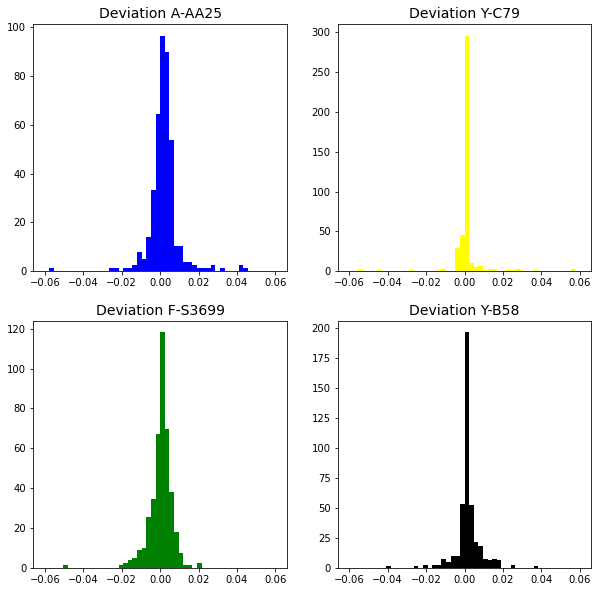

In [7]:
deviation1 = df_f_dev[df_f_dev['PORTFOLIO_CODE'] == 'A-AA25']['DEVIATION_IN_PERCENT_OF_IBOR']
deviation2 = df_f_dev[df_f_dev['PORTFOLIO_CODE'] == 'Y-C79']['DEVIATION_IN_PERCENT_OF_IBOR']
deviation3 = df_f_dev[df_f_dev['PORTFOLIO_CODE'] == 'F-S3699']['DEVIATION_IN_PERCENT_OF_IBOR']
deviation4 = df_f_dev[df_f_dev['PORTFOLIO_CODE'] == 'Y-B58']['DEVIATION_IN_PERCENT_OF_IBOR']

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
ax1.hist(deviation1, bins=50, range=(-0.06,+0.06), density=True, color='blue')
ax2 = fig.add_subplot(2,2,2)
ax2.hist(deviation2, bins=50, range=(-0.06,+0.06), density=True, color='yellow')
ax3 = fig.add_subplot(2,2,3)
ax3.hist(deviation3, bins=50, range=(-0.06,+0.06), density=True, color='green')
ax4 = fig.add_subplot(2,2,4)
ax4.hist(deviation4, bins=50, range=(-0.06,+0.06), density=True, color='black')

ax1.set_title('Deviation A-AA25', fontsize=14);
ax2.set_title('Deviation Y-C79', fontsize=14);
ax3.set_title('Deviation F-S3699', fontsize=14);
ax4.set_title('Deviation Y-B58', fontsize=14);



<AxesSubplot:ylabel='Frequency'>

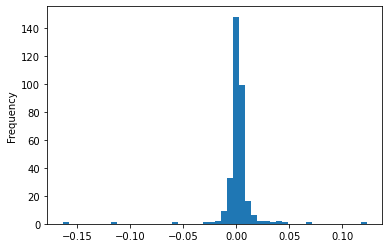

In [8]:
deviation1.plot.hist(bins=50)


<AxesSubplot:ylabel='Frequency'>

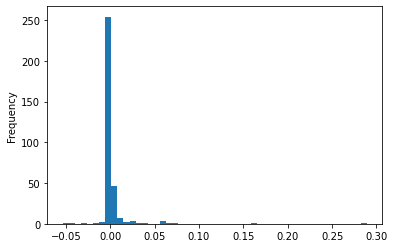

In [9]:
deviation2.plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

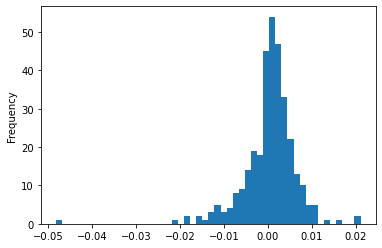

In [10]:
deviation3.plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

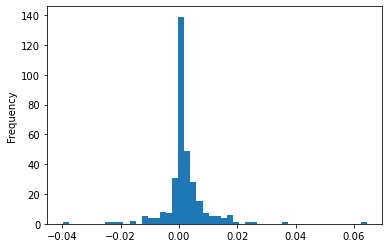

In [11]:
deviation4.plot.hist(bins=50)

In [12]:
# Which effective dates and portfolios have a high deviation
df_f_dev[df_f_dev['DEVIATION_IN_PERCENT_OF_IBOR'].abs() > 0.06 ]

# TOO MUCH  INVESTIGATE!!!!!!!!!!!!

,EFFECTIVE_DATE,PORTFOLIO_CODE,MARKET_VALUE_DIRTY_PORTFOLIO,OPRH_TOTAL_AMOUNT_BASE,DEVIATION_IN_PERCENT_OF_IBOR
15,2019-11-25 00:00:00.000,A-AA25,4.117474e+08,479145578.4,-0.163688
64,2020-02-06 00:00:00.000,A-AA25,3.877129e+08,432617526.9,-0.115819
178,2020-07-23 00:00:00.000,A-AA25,5.379402e+08,471549115.2,0.123417
180,2020-07-27 00:00:00.000,A-AA25,5.477037e+08,509010523.1,0.070646
850,2020-08-14 00:00:00.000,Y-B58,1.737085e+08,162513859.4,0.064445
991,2019-11-13 00:00:00.000,Y-C79,4.902878e+07,45567078.7,0.070606
1003,2019-11-29 00:00:00.000,Y-C79,5.281176e+07,49194552.2,0.068492
1286,2021-01-18 00:00:00.000,Y-C79,1.049830e+08,74620667.5,0.289212
1309,2021-02-18 00:00:00.000,Y-C79,1.165779e+08,97738791.8,0.161601
1310,2021-02-19 00:00:00.000,Y-C79,1.241163e+08,116564926.8,0.060841


In [13]:
#Scale the x axis to -1 to 1.0 / Not reasonable
scaled_deviation = pre.minmax_scale(deviation, (-1,1))

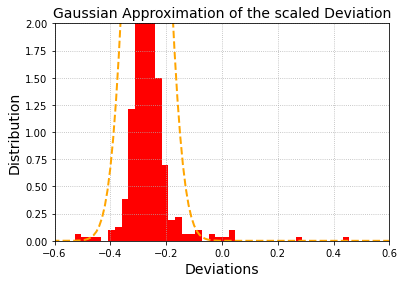

In [14]:
# determine mean and std of the "sepal width" feature
deviation_mean = np.mean(scaled_deviation)
deviation_std = np.std(scaled_deviation)

# take fig and ax from aboveprepare plot
fig = plt.figure()
ax = fig.add_subplot()

# plot fitted "gaussian" or normal distribution
ax.plot(np.arange(-1, 1, 0.01), norm.pdf(np.arange(-1, 1, 0.01), deviation_mean, deviation_std), color='orange', linestyle='--', linewidth=2)

# plot histogram 
ax.hist(scaled_deviation, bins=50, range=(-0.6,+0.6), density=True, color='red')

# add grid
ax.grid(linestyle='dotted')

# add axis range and legends
ax.set_xlabel("Deviations", fontsize=14)
ax.set_ylabel("Distribution", fontsize=14)

ax.set_ylim([0,2])
ax.set_xlim([-0.6,0.6])

# add plot title
#ax.set_title('Distribution of deviations', fontsize=14);
# add plot title
ax.set_title('Gaussian Approximation of the scaled Deviation', fontsize=14);



In [15]:
# Check aggregated deviations in the time series
# group by effective date

df2 = df_f_dev[['EFFECTIVE_DATE', 'DEVIATION_IN_PERCENT_OF_IBOR']]

by_date= df2.groupby('EFFECTIVE_DATE')

df_ts_dev= pd.DataFrame(by_date.sum())

df_ts_dev.head(10)


,DEVIATION_IN_PERCENT_OF_IBOR
EFFECTIVE_DATE,
2019-11-04 00:00:00.000,0.002064
2019-11-05 00:00:00.000,0.005532
2019-11-06 00:00:00.000,0.007852
2019-11-07 00:00:00.000,0.003299
2019-11-08 00:00:00.000,0.000218
2019-11-11 00:00:00.000,-0.001541
2019-11-12 00:00:00.000,-0.000027
2019-11-13 00:00:00.000,0.084678
2019-11-14 00:00:00.000,-0.003343


<AxesSubplot:xlabel='EFFECTIVE_DATE'>

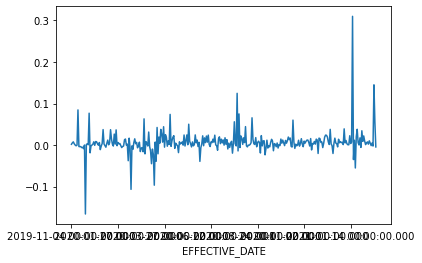

In [16]:
df_ts_dev['DEVIATION_IN_PERCENT_OF_IBOR'].plot()

<AxesSubplot:xlabel='EFFECTIVE_DATE', ylabel='DEVIATION_IN_PERCENT_OF_IBOR'>

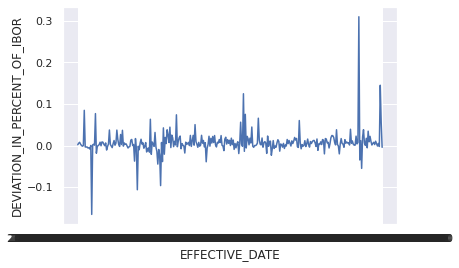

In [17]:
#Seaborn Timeseries Plot
sns.set_theme(style = "darkgrid")
sns.lineplot(data=df_ts_dev, x='EFFECTIVE_DATE', y='DEVIATION_IN_PERCENT_OF_IBOR')
# NOT BEAUTIFUL!!!!!!!!!!

In [18]:
# Check which dates have a high deviation. Was something wrong on theses days?
df_ts_dev[df_ts_dev['DEVIATION_IN_PERCENT_OF_IBOR'].abs() > 0.1]

,DEVIATION_IN_PERCENT_OF_IBOR
EFFECTIVE_DATE,
2019-11-25 00:00:00.000,-0.165601
2020-02-06 00:00:00.000,-0.106326
2020-07-23 00:00:00.000,0.124578
2021-01-18 00:00:00.000,0.309690
2021-02-18 00:00:00.000,0.144964


In [19]:
#Read asset_type file = export from database
df_f_atype_org = pd.read_csv('feature_ibor_asset_type_new.csv', sep=';')
print(df_f_atype_org.head(10))
print(df_f_atype_org.count())

            EFFECTIVE_DATE PORTFOLIO_CODE ASSET_TYPE  PERCENTAGE_ASSET_TYPE
0  2020-04-24 00:00:00.000          Y-C79    Futures           0.000000e+00
1  2020-02-28 00:00:00.000         A-AA25    Forward          -8.541240e-07
2  2020-01-07 00:00:00.000          Y-C79      Debts           8.781122e-01
3  2020-02-06 00:00:00.000          Y-B58      Funds           9.009207e-03
4  2020-02-25 00:00:00.000          Y-B58      Funds           9.277869e-03
5  2020-06-17 00:00:00.000          Y-B58    Forward           3.997831e-05
6  2020-11-16 00:00:00.000          Y-B58    Forward           1.559747e-05
7  2020-02-27 00:00:00.000          Y-C79       Cash           4.077245e-02
8  2020-11-26 00:00:00.000        F-S3699      Funds           1.045969e-02
9  2020-08-06 00:00:00.000          Y-B58    Forward           5.318570e-05
EFFECTIVE_DATE           6324
PORTFOLIO_CODE           6324
ASSET_TYPE               6324
PERCENTAGE_ASSET_TYPE    6324
dtype: int64


In [20]:
# put values of asset type into column by pivoting
df_f_atype_org.sort_values(by=['EFFECTIVE_DATE', 'PORTFOLIO_CODE'])

df_f_atype_piv=df_f_atype_org.pivot_table( values='PERCENTAGE_ASSET_TYPE',index=['EFFECTIVE_DATE', 'PORTFOLIO_CODE'], columns=['ASSET_TYPE'])

df_f_atype_piv.head(100)

ASSET_TYPE                                  Cash     Debts  Equities  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                 
2019-11-04 00:00:00.000 A-AA25          0.012110       NaN  0.987858   
                        F-S3699         0.019924  0.329435  0.638094   
                        Y-B58           0.027819  0.962720       NaN   
                        Y-C79           0.008234  0.906783       NaN   
2019-11-05 00:00:00.000 A-AA25          0.015321       NaN  0.984646   
...                                          ...       ...       ...   
2019-12-05 00:00:00.000 Y-C79           0.047855  0.869782       NaN   
2019-12-06 00:00:00.000 A-AA25          0.029472       NaN  0.970531   
                        F-S3699         0.016342  0.339236  0.635968   
                        Y-B58           0.026167  0.964615       NaN   
                        Y-C79           0.049767  0.868410       NaN   

ASSET_TYPE                               Forward     Funds  Futures  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                
2019-11-04 00:00:00.000 A-AA25          0.000032       NaN      NaN   
                        F-S3699              NaN  0.012547      NaN   
                        Y-B58           0.000147  0.009315      NaN   
                        Y-C79           0.000500  0.084864      0.0   
2019-11-05 00:00:00.000 A-AA25          0.000033       NaN      NaN   
...                                          ...       ...      ...   
2019-12-05 00:00:00.000 Y-C79          -0.000397  0.085896      0.0   
2019-12-06 00:00:00.000 A-AA25         -0.000004       NaN      NaN   
                        F-S3699              NaN  0.008454      NaN   
                        Y-B58          -0.000023  0.009241      NaN   
                        Y-C79          -0.000658  0.085914      0.0   

ASSET_TYPE                              Listed Options  OTC Option  Rights  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                       
2019-11-04 00:00:00.000 A-AA25                     NaN         NaN     NaN   
                        F-S3699                    NaN         NaN     NaN   
                        Y-B58                      NaN         NaN     NaN   
                        Y-C79                 0.000130    0.000028     NaN   
2019-11-05 00:00:00.000 A-AA25                     NaN         NaN     NaN   
...                                                ...         ...     ...   
2019-12-05 00:00:00.000 Y-C79                 0.000125   -0.002601     NaN   
2019-12-06 00:00:00.000 A-AA25                     NaN         NaN     NaN   
                        F-S3699                    NaN         NaN     NaN   
                        Y-B58                      NaN         NaN     NaN   
                        Y-C79                 0.000068   -0.002851     NaN   

ASSET_TYPE                                 Swaps  unknown_atype  
EFFECTIVE_DATE          PORTFOLIO_CODE                           
2019-11-04 00:00:00.000 A-AA25               NaN            NaN  
                        F-S3699              NaN            NaN  
                        Y-B58                NaN            NaN  
                        Y-C79          -0.000538            NaN  
2019-11-05 00:00:00.000 A-AA25               NaN            NaN  
...                                          ...            ...  
2019-12-05 00:00:00.000 Y-C79          -0.000659            NaN  
2019-12-06 00:00:00.000 A-AA25               NaN            NaN  
                        F-S3699              NaN            NaN  
                        Y-B58                NaN            NaN  
                        Y-C79          -0.000650            NaN  

[100 rows x 11 columns]

In [21]:
# Fill NaN with 0 which is logically the correct value
df_f_atype_piv.fillna(0, inplace=True)

df_f_atype_piv.head(100)


ASSET_TYPE                                  Cash     Debts  Equities  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                 
2019-11-04 00:00:00.000 A-AA25          0.012110  0.000000  0.987858   
                        F-S3699         0.019924  0.329435  0.638094   
                        Y-B58           0.027819  0.962720  0.000000   
                        Y-C79           0.008234  0.906783  0.000000   
2019-11-05 00:00:00.000 A-AA25          0.015321  0.000000  0.984646   
...                                          ...       ...       ...   
2019-12-05 00:00:00.000 Y-C79           0.047855  0.869782  0.000000   
2019-12-06 00:00:00.000 A-AA25          0.029472  0.000000  0.970531   
                        F-S3699         0.016342  0.339236  0.635968   
                        Y-B58           0.026167  0.964615  0.000000   
                        Y-C79           0.049767  0.868410  0.000000   

ASSET_TYPE                               Forward     Funds  Futures  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                
2019-11-04 00:00:00.000 A-AA25          0.000032  0.000000      0.0   
                        F-S3699         0.000000  0.012547      0.0   
                        Y-B58           0.000147  0.009315      0.0   
                        Y-C79           0.000500  0.084864      0.0   
2019-11-05 00:00:00.000 A-AA25          0.000033  0.000000      0.0   
...                                          ...       ...      ...   
2019-12-05 00:00:00.000 Y-C79          -0.000397  0.085896      0.0   
2019-12-06 00:00:00.000 A-AA25         -0.000004  0.000000      0.0   
                        F-S3699         0.000000  0.008454      0.0   
                        Y-B58          -0.000023  0.009241      0.0   
                        Y-C79          -0.000658  0.085914      0.0   

ASSET_TYPE                              Listed Options  OTC Option  Rights  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                       
2019-11-04 00:00:00.000 A-AA25                0.000000    0.000000     0.0   
                        F-S3699               0.000000    0.000000     0.0   
                        Y-B58                 0.000000    0.000000     0.0   
                        Y-C79                 0.000130    0.000028     0.0   
2019-11-05 00:00:00.000 A-AA25                0.000000    0.000000     0.0   
...                                                ...         ...     ...   
2019-12-05 00:00:00.000 Y-C79                 0.000125   -0.002601     0.0   
2019-12-06 00:00:00.000 A-AA25                0.000000    0.000000     0.0   
                        F-S3699               0.000000    0.000000     0.0   
                        Y-B58                 0.000000    0.000000     0.0   
                        Y-C79                 0.000068   -0.002851     0.0   

ASSET_TYPE                                 Swaps  unknown_atype  
EFFECTIVE_DATE          PORTFOLIO_CODE                           
2019-11-04 00:00:00.000 A-AA25          0.000000            0.0  
                        F-S3699         0.000000            0.0  
                        Y-B58           0.000000            0.0  
                        Y-C79          -0.000538            0.0  
2019-11-05 00:00:00.000 A-AA25          0.000000            0.0  
...                                          ...            ...  
2019-12-05 00:00:00.000 Y-C79          -0.000659            0.0  
2019-12-06 00:00:00.000 A-AA25          0.000000            0.0  
                        F-S3699         0.000000            0.0  
                        Y-B58           0.000000            0.0  
                        Y-C79          -0.000650            0.0  

[100 rows x 11 columns]

In [22]:
#Read region file = export from database
df_f_region_org = pd.read_csv('feature_ibor_region_new.csv', sep=';')
df_f_region_org.head(10)

,EFFECTIVE_DATE,PORTFOLIO_CODE,REGION,PERCENTAGE_REGION
0,2020-12-28 00:00:00.000,Y-B58,Americas,0.108516
1,2021-01-27 00:00:00.000,Y-C79,Europe,1.022130
2,2020-03-05 00:00:00.000,Y-C79,Asia,0.008837
3,2020-06-22 00:00:00.000,Y-C79,unknown_reg,0.003001
4,2021-02-17 00:00:00.000,Y-C79,Asia,0.007101
5,2020-10-28 00:00:00.000,F-S3699,Asia,0.009025
6,2020-04-21 00:00:00.000,Y-B58,InternationalOrg,0.011423
7,2020-07-15 00:00:00.000,F-S3699,Oceania,0.001733
8,2020-05-08 00:00:00.000,Y-B58,Asia,0.020066
9,2020-01-15 00:00:00.000,Y-C79,Asia,0.002119


In [23]:
# put values of region into column by pivoting
df_f_region_org.sort_values(by=['EFFECTIVE_DATE', 'PORTFOLIO_CODE'])

df_f_region_piv=df_f_region_org.pivot_table( values='PERCENTAGE_REGION',index=['EFFECTIVE_DATE', 'PORTFOLIO_CODE'], columns=['REGION'])

df_f_region_piv.head(100)



REGION                                    Africa  Americas      Asia  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                 
2019-11-04 00:00:00.000 A-AA25               NaN  0.011357  0.988471   
                        F-S3699              NaN  0.106325       NaN   
                        Y-B58                NaN  0.098660  0.020439   
                        Y-C79           0.004599 -0.034056  0.002566   
2019-11-05 00:00:00.000 A-AA25               NaN  0.015185  0.984543   
...                                          ...       ...       ...   
2019-12-05 00:00:00.000 Y-C79           0.003965 -0.012206  0.002212   
2019-12-06 00:00:00.000 A-AA25               NaN  0.030232  0.969593   
                        F-S3699              NaN  0.152615  0.005028   
                        Y-B58                NaN  0.101239  0.019259   
                        Y-C79           0.003964 -0.012400  0.002214   

REGION                                    Europe  InternationalOrg   Oceania  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                         
2019-11-04 00:00:00.000 A-AA25          0.000172               NaN       NaN   
                        F-S3699         0.893675               NaN       NaN   
                        Y-B58           0.864276          0.016625       NaN   
                        Y-C79           1.028349          0.006772 -0.008238   
2019-11-05 00:00:00.000 A-AA25          0.000273               NaN       NaN   
...                                          ...               ...       ...   
2019-12-05 00:00:00.000 Y-C79           1.001577          0.005801 -0.007070   
2019-12-06 00:00:00.000 A-AA25          0.000175               NaN       NaN   
                        F-S3699         0.840908               NaN  0.001448   
                        Y-B58           0.865653          0.013849       NaN   
                        Y-C79           1.001835          0.005800 -0.007107   

REGION                                  unknown_reg  
EFFECTIVE_DATE          PORTFOLIO_CODE               
2019-11-04 00:00:00.000 A-AA25                  NaN  
                        F-S3699                 NaN  
                        Y-B58                   NaN  
                        Y-C79              0.000008  
2019-11-05 00:00:00.000 A-AA25                  NaN  
...                                             ...  
2019-12-05 00:00:00.000 Y-C79              0.005721  
2019-12-06 00:00:00.000 A-AA25                  NaN  
                        F-S3699                 NaN  
                        Y-B58                   NaN  
                        Y-C79              0.005694  

[100 rows x 7 columns]

In [24]:
# Fill NaN with 0 which is logically the correct value
df_f_region_piv.fillna(0, inplace=True)

df_f_region_piv.head(100)


REGION                                    Africa  Americas      Asia  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                 
2019-11-04 00:00:00.000 A-AA25          0.000000  0.011357  0.988471   
                        F-S3699         0.000000  0.106325  0.000000   
                        Y-B58           0.000000  0.098660  0.020439   
                        Y-C79           0.004599 -0.034056  0.002566   
2019-11-05 00:00:00.000 A-AA25          0.000000  0.015185  0.984543   
...                                          ...       ...       ...   
2019-12-05 00:00:00.000 Y-C79           0.003965 -0.012206  0.002212   
2019-12-06 00:00:00.000 A-AA25          0.000000  0.030232  0.969593   
                        F-S3699         0.000000  0.152615  0.005028   
                        Y-B58           0.000000  0.101239  0.019259   
                        Y-C79           0.003964 -0.012400  0.002214   

REGION                                    Europe  InternationalOrg   Oceania  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                         
2019-11-04 00:00:00.000 A-AA25          0.000172          0.000000  0.000000   
                        F-S3699         0.893675          0.000000  0.000000   
                        Y-B58           0.864276          0.016625  0.000000   
                        Y-C79           1.028349          0.006772 -0.008238   
2019-11-05 00:00:00.000 A-AA25          0.000273          0.000000  0.000000   
...                                          ...               ...       ...   
2019-12-05 00:00:00.000 Y-C79           1.001577          0.005801 -0.007070   
2019-12-06 00:00:00.000 A-AA25          0.000175          0.000000  0.000000   
                        F-S3699         0.840908          0.000000  0.001448   
                        Y-B58           0.865653          0.013849  0.000000   
                        Y-C79           1.001835          0.005800 -0.007107   

REGION                                  unknown_reg  
EFFECTIVE_DATE          PORTFOLIO_CODE               
2019-11-04 00:00:00.000 A-AA25             0.000000  
                        F-S3699            0.000000  
                        Y-B58              0.000000  
                        Y-C79              0.000008  
2019-11-05 00:00:00.000 A-AA25             0.000000  
...                                             ...  
2019-12-05 00:00:00.000 Y-C79              0.005721  
2019-12-06 00:00:00.000 A-AA25             0.000000  
                        F-S3699            0.000000  
                        Y-B58              0.000000  
                        Y-C79              0.005694  

[100 rows x 7 columns]

In [25]:
# check record counts of feature tables. Should be identical
df_f_dev.head(100)

,EFFECTIVE_DATE,PORTFOLIO_CODE,MARKET_VALUE_DIRTY_PORTFOLIO,OPRH_TOTAL_AMOUNT_BASE,DEVIATION_IN_PERCENT_OF_IBOR
0,2019-11-04 00:00:00.000,A-AA25,4.855158e+08,484074025.6,0.002970
1,2019-11-05 00:00:00.000,A-AA25,4.897845e+08,488636111.7,0.002345
2,2019-11-06 00:00:00.000,A-AA25,4.898977e+08,488152563.0,0.003562
3,2019-11-07 00:00:00.000,A-AA25,4.926490e+08,491071123.4,0.003203
4,2019-11-08 00:00:00.000,A-AA25,4.911470e+08,489895646.5,0.002548
...,...,...,...,...,...
95,2020-03-20 00:00:00.000,A-AA25,3.209224e+08,321812013.0,-0.002772
96,2020-03-23 00:00:00.000,A-AA25,3.095406e+08,309604448.7,-0.000206
97,2020-03-24 00:00:00.000,A-AA25,3.251301e+08,321907824.6,0.009911
98,2020-03-25 00:00:00.000,A-AA25,3.340692e+08,335639490.7,-0.004701


In [26]:
print(df_f_dev.count())
print(df_f_region_piv.count())
print(df_f_atype_piv.count())

EFFECTIVE_DATE                  1312
PORTFOLIO_CODE                  1312
MARKET_VALUE_DIRTY_PORTFOLIO    1312
OPRH_TOTAL_AMOUNT_BASE          1312
DEVIATION_IN_PERCENT_OF_IBOR    1312
dtype: int64
REGION
Africa              1312
Americas            1312
Asia                1312
Europe              1312
InternationalOrg    1312
Oceania             1312
unknown_reg         1312
dtype: int64
ASSET_TYPE
Cash              1312
Debts             1312
Equities          1312
Forward           1312
Funds             1312
Futures           1312
Listed Options    1312
OTC Option        1312
Rights            1312
Swaps             1312
unknown_atype     1312
dtype: int64


In [27]:
#Merge all 3 features together

df_merge1= pd.merge(df_f_dev, df_f_region_piv, on =['EFFECTIVE_DATE','PORTFOLIO_CODE'])
df_merge1.head(100)
#print(df_merge1.count())

df_ibor_f_set1 = pd.merge(df_merge1, df_f_atype_piv, on =['EFFECTIVE_DATE','PORTFOLIO_CODE'])
df_ibor_f_set1.head(100)
#print(df_ibor_f_set.count())


,EFFECTIVE_DATE,PORTFOLIO_CODE,MARKET_VALUE_DIRTY_PORTFOLIO,OPRH_TOTAL_AMOUNT_BASE,DEVIATION_IN_PERCENT_OF_IBOR,Africa,Americas,Asia,Europe,InternationalOrg,Oceania,unknown_reg,Cash,Debts,Equities,Forward,Funds,Futures,Listed Options,OTC Option,Rights,Swaps,unknown_atype
0,2019-11-04 00:00:00.000,A-AA25,4.855158e+08,484074025.6,0.002970,0.0,0.011357,0.988471,0.000172,0.0,0.0,0.0,0.012110,0.0,0.987858,0.000032,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-11-05 00:00:00.000,A-AA25,4.897845e+08,488636111.7,0.002345,0.0,0.015185,0.984543,0.000273,0.0,0.0,0.0,0.015321,0.0,0.984646,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-11-06 00:00:00.000,A-AA25,4.898977e+08,488152563.0,0.003562,0.0,0.014814,0.985091,0.000095,0.0,0.0,0.0,0.015344,0.0,0.984623,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-11-07 00:00:00.000,A-AA25,4.926490e+08,491071123.4,0.003203,0.0,0.014541,0.986265,-0.000805,0.0,0.0,0.0,0.014469,0.0,0.985497,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-11-08 00:00:00.000,A-AA25,4.911470e+08,489895646.5,0.002548,0.0,0.013950,0.986083,-0.000033,0.0,0.0,0.0,0.014526,0.0,0.985441,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-03-20 00:00:00.000,A-AA25,3.209224e+08,321812013.0,-0.002772,0.0,0.024459,0.975524,0.000016,0.0,0.0,0.0,0.025534,0.0,0.974479,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,2020-03-23 00:00:00.000,A-AA25,3.095406e+08,309604448.7,-0.000206,0.0,0.025000,0.976186,-0.001186,0.0,0.0,0.0,0.025289,0.0,0.974723,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,2020-03-24 00:00:00.000,A-AA25,3.251301e+08,321907824.6,0.009911,0.0,0.025263,0.975687,-0.000950,0.0,0.0,0.0,0.024716,0.0,0.975292,-0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2020-03-25 00:00:00.000,A-AA25,3.340692e+08,335639490.7,-0.004701,0.0,0.014462,0.985439,0.000099,0.0,0.0,0.0,0.015165,0.0,0.984847,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# Cut out ABOR values

df_ibor_f_set1.drop('MARKET_VALUE_DIRTY_PORTFOLIO', axis=1, inplace=True)
df_ibor_f_set1.drop('OPRH_TOTAL_AMOUNT_BASE', axis=1, inplace=True)
df_ibor_f_set1.head(100)

,EFFECTIVE_DATE,PORTFOLIO_CODE,DEVIATION_IN_PERCENT_OF_IBOR,Africa,Americas,Asia,Europe,InternationalOrg,Oceania,unknown_reg,Cash,Debts,Equities,Forward,Funds,Futures,Listed Options,OTC Option,Rights,Swaps,unknown_atype
0,2019-11-04 00:00:00.000,A-AA25,0.002970,0.0,0.011357,0.988471,0.000172,0.0,0.0,0.0,0.012110,0.0,0.987858,0.000032,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-11-05 00:00:00.000,A-AA25,0.002345,0.0,0.015185,0.984543,0.000273,0.0,0.0,0.0,0.015321,0.0,0.984646,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-11-06 00:00:00.000,A-AA25,0.003562,0.0,0.014814,0.985091,0.000095,0.0,0.0,0.0,0.015344,0.0,0.984623,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-11-07 00:00:00.000,A-AA25,0.003203,0.0,0.014541,0.986265,-0.000805,0.0,0.0,0.0,0.014469,0.0,0.985497,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-11-08 00:00:00.000,A-AA25,0.002548,0.0,0.013950,0.986083,-0.000033,0.0,0.0,0.0,0.014526,0.0,0.985441,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-03-20 00:00:00.000,A-AA25,-0.002772,0.0,0.024459,0.975524,0.000016,0.0,0.0,0.0,0.025534,0.0,0.974479,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,2020-03-23 00:00:00.000,A-AA25,-0.000206,0.0,0.025000,0.976186,-0.001186,0.0,0.0,0.0,0.025289,0.0,0.974723,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,2020-03-24 00:00:00.000,A-AA25,0.009911,0.0,0.025263,0.975687,-0.000950,0.0,0.0,0.0,0.024716,0.0,0.975292,-0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,2020-03-25 00:00:00.000,A-AA25,-0.004701,0.0,0.014462,0.985439,0.000099,0.0,0.0,0.0,0.015165,0.0,0.984847,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#index the ibor feature set
df_ibor_f_set1.head(100)
df_ibor_f_set = df_ibor_f_set1.set_index( ['EFFECTIVE_DATE','PORTFOLIO_CODE'], drop=False)
df_ibor_f_set.head(100)


,,EFFECTIVE_DATE,PORTFOLIO_CODE,DEVIATION_IN_PERCENT_OF_IBOR,Africa,Americas,Asia,Europe,InternationalOrg,Oceania,unknown_reg,Cash,Debts,Equities,Forward,Funds,Futures,Listed Options,OTC Option,Rights,Swaps,unknown_atype
EFFECTIVE_DATE,PORTFOLIO_CODE,,,,,,,,,,,,,,,,,,,,,
2019-11-04 00:00:00.000,A-AA25,2019-11-04 00:00:00.000,A-AA25,0.002970,0.0,0.011357,0.988471,0.000172,0.0,0.0,0.0,0.012110,0.0,0.987858,0.000032,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-05 00:00:00.000,A-AA25,2019-11-05 00:00:00.000,A-AA25,0.002345,0.0,0.015185,0.984543,0.000273,0.0,0.0,0.0,0.015321,0.0,0.984646,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-06 00:00:00.000,A-AA25,2019-11-06 00:00:00.000,A-AA25,0.003562,0.0,0.014814,0.985091,0.000095,0.0,0.0,0.0,0.015344,0.0,0.984623,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-07 00:00:00.000,A-AA25,2019-11-07 00:00:00.000,A-AA25,0.003203,0.0,0.014541,0.986265,-0.000805,0.0,0.0,0.0,0.014469,0.0,0.985497,0.000034,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2019-11-08 00:00:00.000,A-AA25,2019-11-08 00:00:00.000,A-AA25,0.002548,0.0,0.013950,0.986083,-0.000033,0.0,0.0,0.0,0.014526,0.0,0.985441,0.000033,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20 00:00:00.000,A-AA25,2020-03-20 00:00:00.000,A-AA25,-0.002772,0.0,0.024459,0.975524,0.000016,0.0,0.0,0.0,0.025534,0.0,0.974479,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-23 00:00:00.000,A-AA25,2020-03-23 00:00:00.000,A-AA25,-0.000206,0.0,0.025000,0.976186,-0.001186,0.0,0.0,0.0,0.025289,0.0,0.974723,-0.000012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-24 00:00:00.000,A-AA25,2020-03-24 00:00:00.000,A-AA25,0.009911,0.0,0.025263,0.975687,-0.000950,0.0,0.0,0.0,0.024716,0.0,0.975292,-0.000008,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df_ibor_f_set.iloc[2]

EFFECTIVE_DATE                  2019-11-06 00:00:00.000
PORTFOLIO_CODE                                   A-AA25
DEVIATION_IN_PERCENT_OF_IBOR                   0.003562
Africa                                              0.0
Americas                                       0.014814
Asia                                           0.985091
Europe                                         0.000095
InternationalOrg                                    0.0
Oceania                                             0.0
unknown_reg                                         0.0
Cash                                           0.015344
Debts                                               0.0
Equities                                       0.984623
Forward                                        0.000033
Funds                                               0.0
Futures                                             0.0
Listed Options                                      0.0
OTC Option                                      

<Figure size 720x720 with 0 Axes>

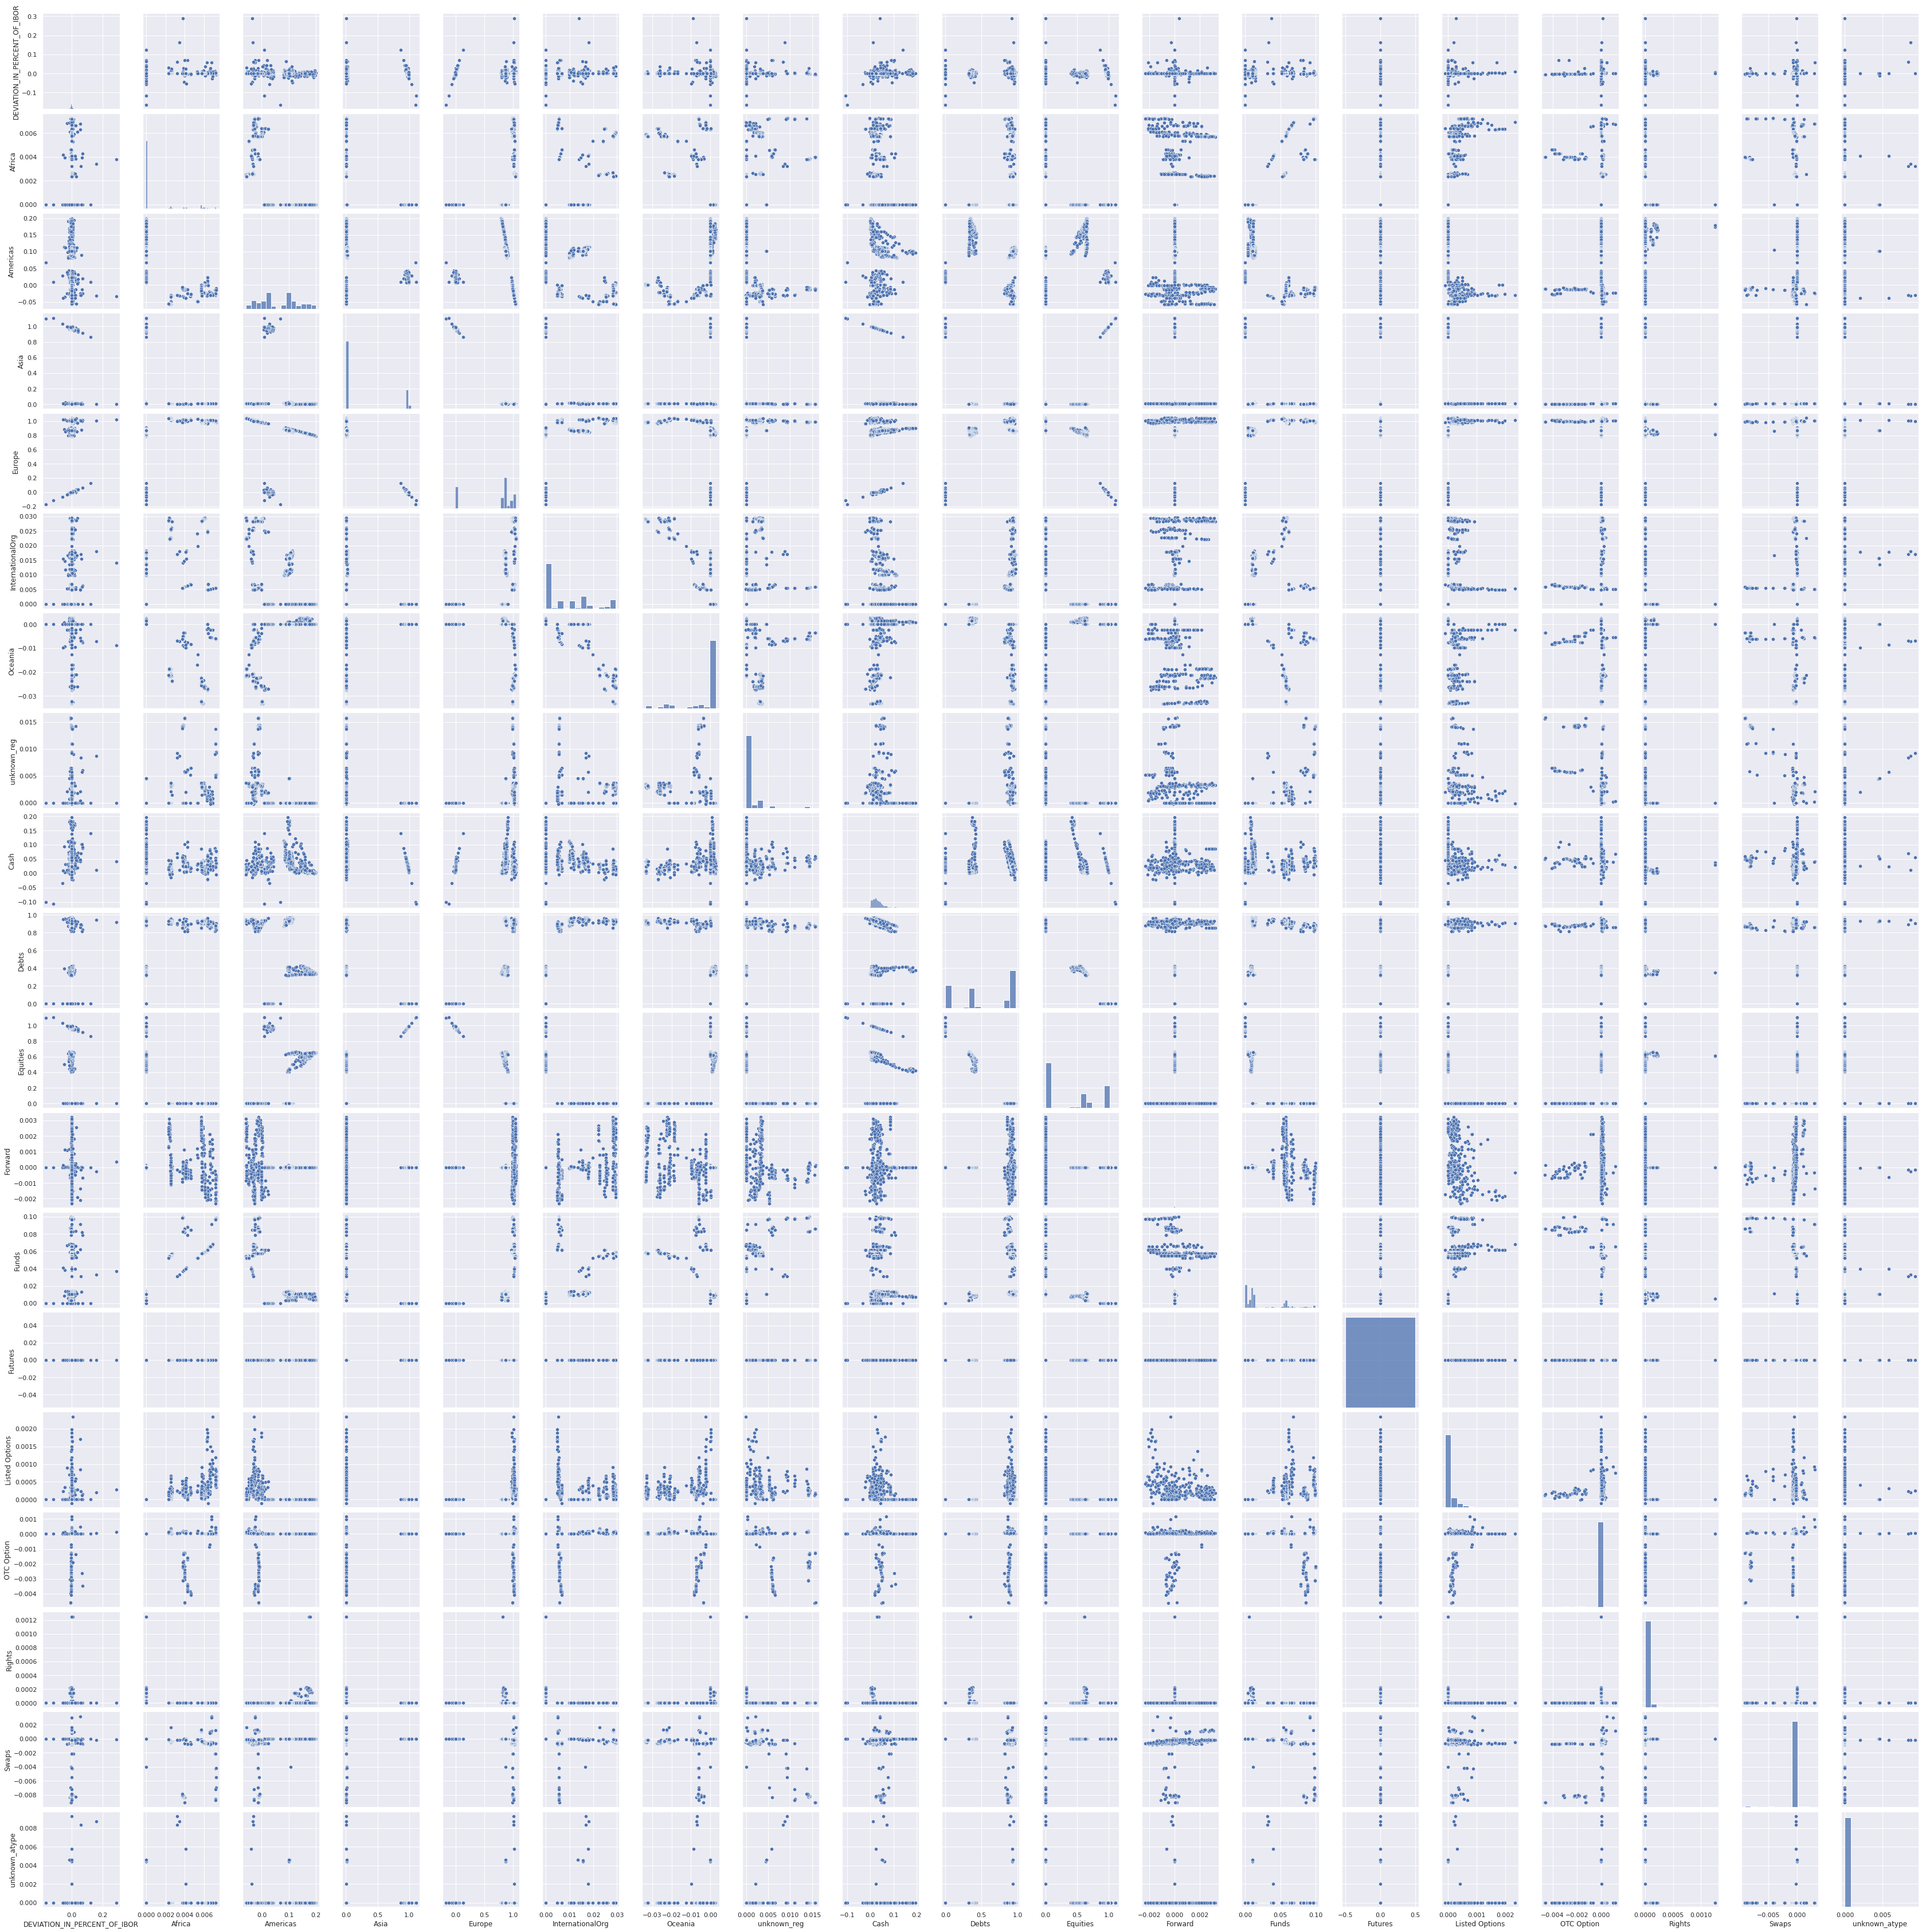

In [31]:
# init the plot
plt.figure(figsize=(10, 10))

#plot a pairplot of the distinct feature distributions
sns.pairplot( df_ibor_f_set)

In [32]:
#Round the deviations as plot aspect 
df_ibor_f_set1 = df_ibor_f_set.copy()

df_ibor_f_set1['deviation_rounded']= df_ibor_f_set1['DEVIATION_IN_PERCENT_OF_IBOR'].apply(lambda x: round(x, ndigits=2))

df_ibor_f_set1.head(100)

df_ibor_f_set1.drop('DEVIATION_IN_PERCENT_OF_IBOR', axis=1, inplace=True)

df_ibor_f_set1

,,EFFECTIVE_DATE,PORTFOLIO_CODE,Africa,Americas,Asia,Europe,InternationalOrg,Oceania,unknown_reg,Cash,Debts,Equities,Forward,Funds,Futures,Listed Options,OTC Option,Rights,Swaps,unknown_atype,deviation_rounded
EFFECTIVE_DATE,PORTFOLIO_CODE,,,,,,,,,,,,,,,,,,,,,
2019-11-04 00:00:00.000,A-AA25,2019-11-04 00:00:00.000,A-AA25,0.000000,0.011357,0.988471,0.000172,0.000000,0.000000,0.000000,0.012110,0.000000,0.987858,0.000032,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00
2019-11-05 00:00:00.000,A-AA25,2019-11-05 00:00:00.000,A-AA25,0.000000,0.015185,0.984543,0.000273,0.000000,0.000000,0.000000,0.015321,0.000000,0.984646,0.000033,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00
2019-11-06 00:00:00.000,A-AA25,2019-11-06 00:00:00.000,A-AA25,0.000000,0.014814,0.985091,0.000095,0.000000,0.000000,0.000000,0.015344,0.000000,0.984623,0.000033,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00
2019-11-07 00:00:00.000,A-AA25,2019-11-07 00:00:00.000,A-AA25,0.000000,0.014541,0.986265,-0.000805,0.000000,0.000000,0.000000,0.014469,0.000000,0.985497,0.000034,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00
2019-11-08 00:00:00.000,A-AA25,2019-11-08 00:00:00.000,A-AA25,0.000000,0.013950,0.986083,-0.000033,0.000000,0.000000,0.000000,0.014526,0.000000,0.985441,0.000033,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-16 00:00:00.000,Y-C79,2021-02-16 00:00:00.000,Y-C79,0.004097,-0.037878,0.007094,1.016775,0.017723,-0.009849,0.002039,0.025186,0.932779,0.000000,-0.000026,0.039785,0.0,0.000407,0.000040,0.0,-0.000209,0.002039,0.00
2021-02-17 00:00:00.000,Y-C79,2021-02-17 00:00:00.000,Y-C79,0.004093,-0.038449,0.007101,1.012325,0.017742,-0.008595,0.005784,0.023690,0.931260,0.000000,-0.000636,0.039752,0.0,0.000314,0.000047,0.0,-0.000211,0.005784,0.00
2021-02-18 00:00:00.000,Y-C79,2021-02-18 00:00:00.000,Y-C79,0.003425,-0.032192,0.005950,1.003198,0.018038,-0.007143,0.008725,0.010719,0.947442,0.000000,-0.000277,0.033332,0.0,0.000198,0.000044,0.0,-0.000183,0.008725,0.16


In [33]:
df_ibor_f_set1['deviation_rounded'].unique()



array([ 0.  ,  0.01, -0.16,  0.03, -0.01,  0.02, -0.06, -0.12,  0.04,
        0.12, -0.02,  0.07, -0.03, -0.05, -0.04,  0.06,  0.29,  0.16])

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

<Figure size 1440x1440 with 0 Axes>

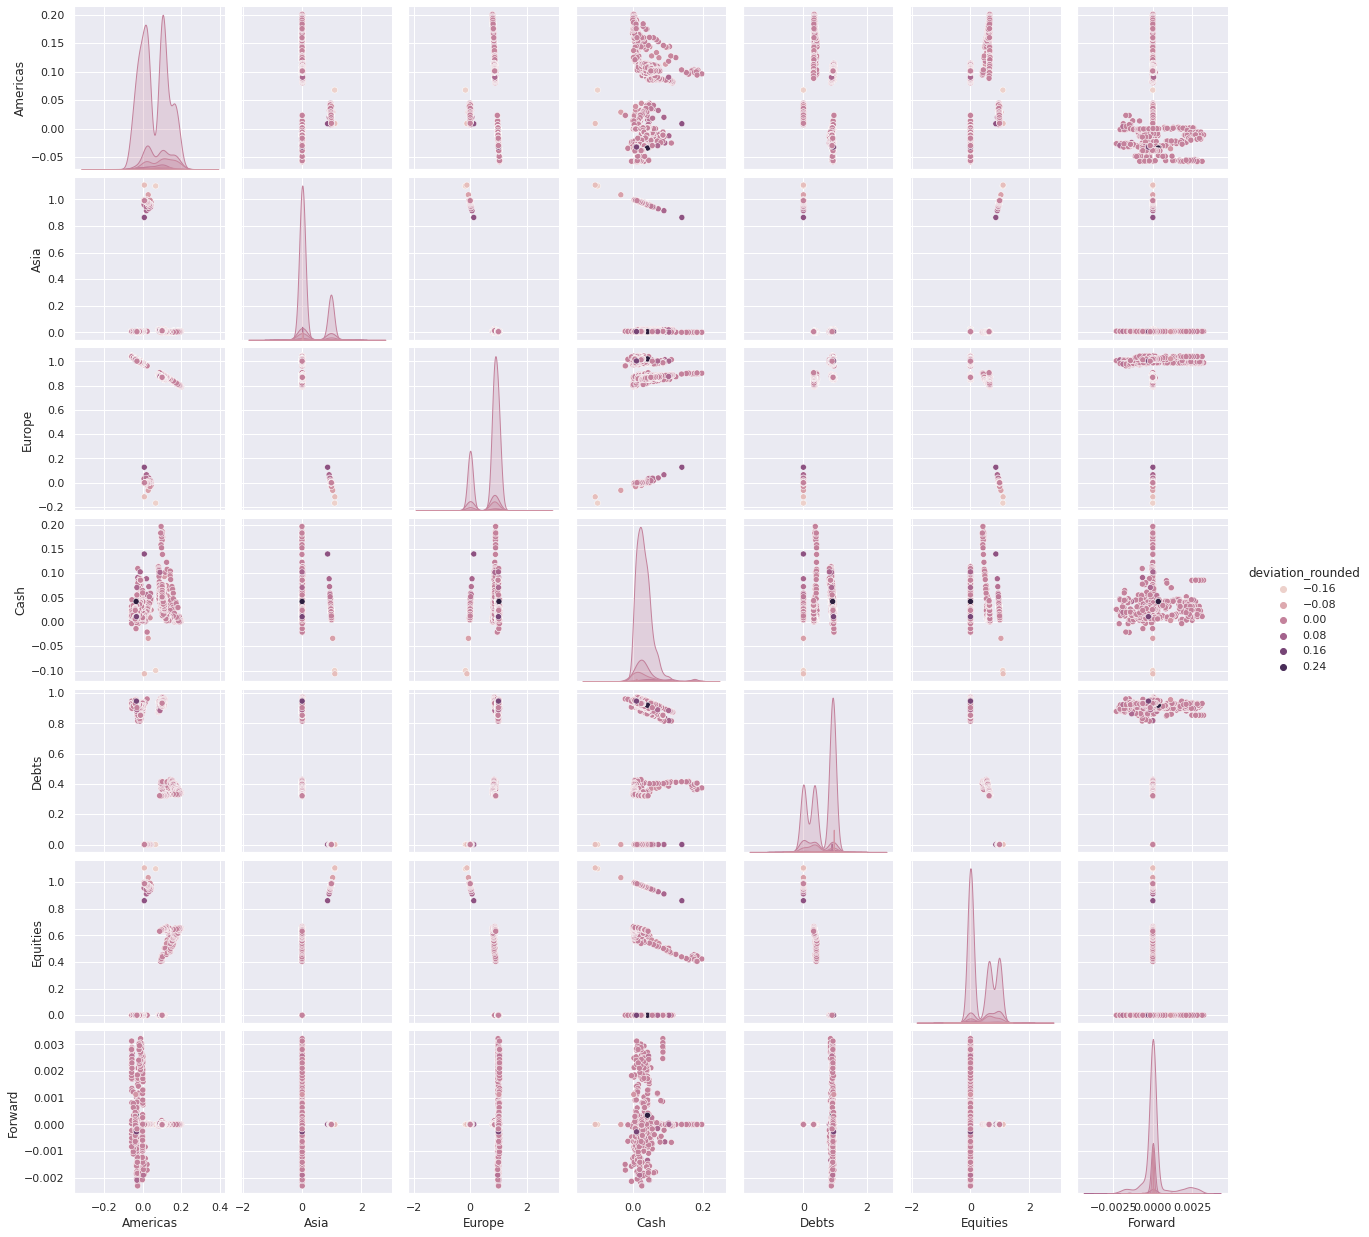

In [34]:
# init the plot
plt.figure(figsize=(20, 20))

# plot a pairplot of the distinct feature distributions
sns.pairplot( df_ibor_f_set1[['Americas', 'Asia', 'Europe','Cash', 'Debts' ,'Equities', 'Forward', 'deviation_rounded']], hue='deviation_rounded')
#sns.pairplot( df_ibor_f_set1)

#sns.pairplot( df_ibor_f_set1[['Americas', 'Europe', 'deviation_stepwise']], hue='deviation_stepwise')

#np.std(df_ibor_f_set1['deviation_stepwise'])

In [35]:
df_ibor_f_set[df_ibor_f_set1['Americas']< -0.0]
#pd.options.display.max_columns = 20
df_ibor_f_set[df_ibor_f_set1['EFFECTIVE_DATE'] == '2019-11-25 00:00:00.000']

EFFECTIVE_DATE  \
EFFECTIVE_DATE          PORTFOLIO_CODE                            
2019-11-25 00:00:00.000 A-AA25          2019-11-25 00:00:00.000   
                        F-S3699         2019-11-25 00:00:00.000   
                        Y-B58           2019-11-25 00:00:00.000   
                        Y-C79           2019-11-25 00:00:00.000   

                                       PORTFOLIO_CODE  \
EFFECTIVE_DATE          PORTFOLIO_CODE                  
2019-11-25 00:00:00.000 A-AA25                 A-AA25   
                        F-S3699               F-S3699   
                        Y-B58                   Y-B58   
                        Y-C79                   Y-C79   

                                        DEVIATION_IN_PERCENT_OF_IBOR  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                 
2019-11-25 00:00:00.000 A-AA25                             -0.163688   
                        F-S3699                             0.002891   
                        Y-B58                              -0.001125   
                        Y-C79                              -0.003679   

                                          Africa  Americas      Asia  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                 
2019-11-25 00:00:00.000 A-AA25          0.000000  0.067662  1.100372   
                        F-S3699         0.000000  0.142664  0.001596   
                        Y-B58           0.000000  0.103512  0.019156   
                        Y-C79           0.004269 -0.013882  0.002380   

                                          Europe  InternationalOrg   Oceania  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                         
2019-11-25 00:00:00.000 A-AA25         -0.168033          0.000000  0.000000   
                        F-S3699         0.854553          0.000000  0.001186   
                        Y-B58           0.860715          0.016618  0.000000   
                        Y-C79           1.002639          0.006244 -0.007606   

                                        unknown_reg      Cash     Debts  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                    
2019-11-25 00:00:00.000 A-AA25             0.000000 -0.099933  0.000000   
                        F-S3699            0.000000  0.024203  0.339572   
                        Y-B58              0.000000  0.037768  0.952954   
                        Y-C79              0.005957  0.035429  0.881391   

                                        Equities   Forward     Funds  Futures  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                          
2019-11-25 00:00:00.000 A-AA25          1.099937 -0.000004  0.000000      0.0   
                        F-S3699         0.627865  0.000000  0.008359      0.0   
                        Y-B58           0.000000 -0.000026  0.009304      0.0   
                        Y-C79           0.000000 -0.000614  0.088342      0.0   

                                        Listed Options  OTC Option  Rights  \
EFFECTIVE_DATE          PORTFOLIO_CODE                                       
2019-11-25 00:00:00.000 A-AA25                 0.00000    0.000000     0.0   
                        F-S3699                0.00000    0.000000     0.0   
                        Y-B58                  0.00000    0.000000     0.0   
                        Y-C79                  0.00004   -0.003851     0.0   

                                           Swaps  unknown_atype  
EFFECTIVE_DATE          PORTFOLIO_CODE                           
2019-11-25 00:00:00.000 A-AA25          0.000000            0.0  
                        F-S3699         0.000000            0.0  
                        Y-B58           0.000000            0.0  
                        Y-C79          -0.000736            0.0

In [36]:
# Try out a PCA

from sklearn import datasets
from sklearn.decomposition import PCA

In [45]:
df1 = df_ibor_f_set.copy()
df1.reset_index(drop=True, inplace=True)
df1

df1_index = df1[['EFFECTIVE_DATE','PORTFOLIO_CODE']]
df1_data = df1[['DEVIATION_IN_PERCENT_OF_IBOR','Africa','Americas','Asia','Europe',
                'InternationalOrg','Oceania','unknown_reg','Cash','Debts','Equities',
                'Forward','Funds','Futures','Listed Options', 'OTC Option','Rights',
                'Swaps','unknown_atype']]

df1_data.head(10)

df1_data.shape

(1312, 19)

In [47]:
#Normalization before PCA is reasonable

pca=PCA(n_components=19)
pca.fit(df1_data)

PCA(n_components=19)

In [48]:
pca.explained_variance_ratio_

array([8.99652269e-01, 9.12020554e-02, 6.95332276e-03, 1.59085086e-03,
       2.84140258e-04, 2.30810795e-04, 7.28770936e-05, 6.54777993e-06,
       4.04167211e-06, 1.22713475e-06, 8.17628834e-07, 5.44939820e-07,
       2.86354958e-07, 1.75636795e-07, 2.77001721e-08, 5.10179236e-09,
       1.79157348e-23, 1.63971082e-32, 7.26845753e-40])

In [49]:
pca=PCA(n_components=2)
pca.fit(df1_data)

PCA(n_components=2)

In [55]:
# check / show what the components mean

print(np.sqrt(np.sum(pca.components_[0]**2)))
print(np.sqrt(np.sum(pca.components_[1]**2)))

pca.components_

0.9999999999999996
0.9999999999999996


array([[-5.09292328e-04, -1.33696039e-03, -5.82139764e-03,
         5.06676908e-01, -4.94214538e-01, -8.72424935e-03,
         4.45789663e-03, -1.03765923e-03, -8.68019743e-03,
        -4.84400132e-01,  5.13567682e-01, -8.24064354e-05,
        -2.06589859e-02, -0.00000000e+00, -8.69237574e-05,
         8.51048913e-05,  2.04607092e-07,  2.98539769e-04,
        -4.28853269e-05],
       [-2.60766600e-03, -2.31952769e-03,  1.91583502e-01,
        -5.73895826e-01,  3.96009588e-01, -1.90518470e-02,
         9.41525922e-03, -1.74114888e-03, -2.48682120e-02,
        -4.62537956e-01,  5.11371416e-01, -1.48346687e-04,
        -2.42506760e-02, -0.00000000e+00, -1.49875558e-04,
         1.27317716e-04,  6.00790892e-05,  4.85010522e-04,
        -8.87573142e-05]])

In [56]:
#PCA execution
Z=pca.transform(df1_data)

In [57]:
Z.shape

(1312, 2)

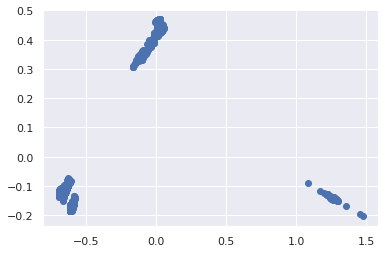

In [58]:
plt.scatter(Z[:,0], Z[:,1])

In [62]:
# Normalization

df1_normalized = pre.normalize(df1_data, norm='l2')

In [66]:
df1_normalized

#df1_data.shape

array([[ 2.12482131e-03,  0.00000000e+00,  8.12632453e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.68370249e-03,  0.00000000e+00,  1.09038076e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.55738488e-03,  0.00000000e+00,  1.06346399e-02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.16232697e-01,  2.46339019e-03, -2.31544600e-02, ...,
         0.00000000e+00, -1.31871840e-04,  6.27529420e-03],
       [ 4.52521077e-02,  2.38560416e-03, -2.22186511e-02, ...,
         0.00000000e+00, -1.36678953e-04,  6.23533548e-03],
       [ 3.93275736e-05,  2.36838959e-03, -2.18994412e-02, ...,
         0.00000000e+00, -1.24893140e-04,  6.86202165e-03]])

In [67]:
pca=PCA(n_components=2)
pca.fit(df1_normalized)

pca.components_

array([[-3.10233601e-04, -1.26587457e-03, -1.10730774e-02,
         4.99481308e-01, -5.09180356e-01, -8.64206450e-03,
         4.13677304e-03, -1.00535322e-03, -1.02972552e-02,
        -4.93905559e-01,  4.96572260e-01, -7.61921354e-05,
        -2.00951777e-02, -0.00000000e+00, -8.22690736e-05,
         8.41942209e-05, -2.68462078e-07,  2.93448972e-04,
        -4.18260051e-05],
       [-2.22989597e-03, -2.03473690e-03,  2.00784597e-01,
        -4.25179524e-01,  5.15998792e-01, -1.63437094e-02,
         8.32653928e-03, -1.56686513e-03, -1.49854035e-02,
        -3.23532232e-01,  6.37978530e-01, -1.28278335e-04,
        -1.97641263e-02, -0.00000000e+00, -1.31670284e-04,
         1.20727698e-04,  5.89162005e-05,  4.45125373e-04,
        -7.64967981e-05]])

In [ ]:
plt.scatter(Z[:,0], Z[:,1])